<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regularização: Árvores de Decisão

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Módulo de Análise Exploratória
import preditiva

## Importação da base de dados

In [2]:
df = pd.read_csv('emprestimos.csv', sep=';')
df.head(5)

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

Idade                   0
Genero                  0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Default                 0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Genero                1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Default               1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

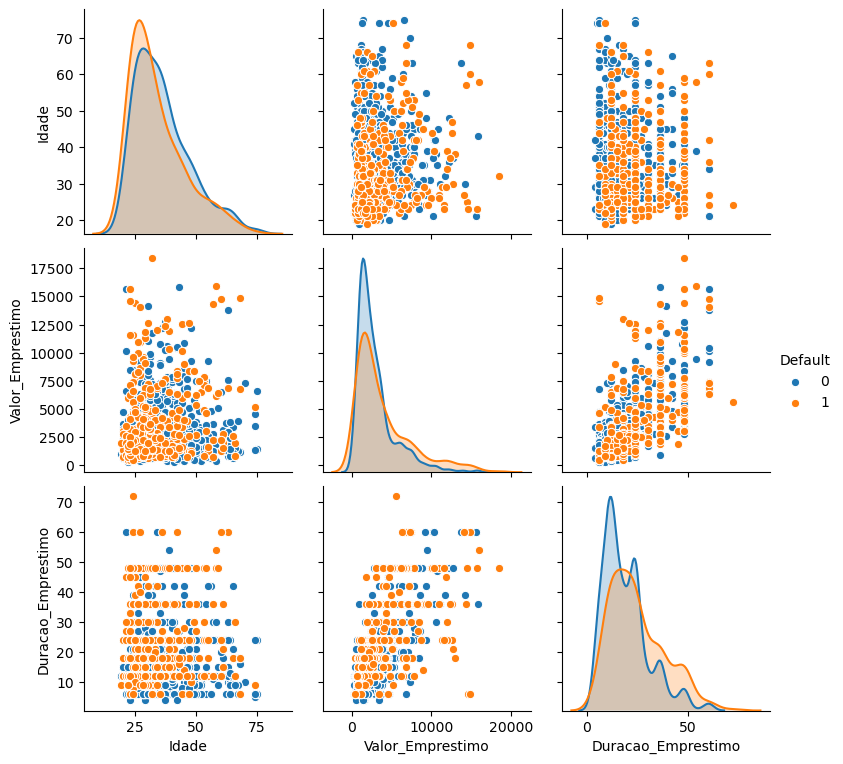

In [6]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='Default');

### Relatórios Pandas Profiling e SweetViz

In [7]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='Default')

:TARGET::                          |██                   | [ 10%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [8]:
df.head(5)

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


In [9]:
# Target (variável resposta)
y_var = 'Default'
y = df[y_var]

# Features (variáveis explicativas)
x_var = ['Idade', 'Genero', 'Escolaridade', 'Tipo_Moradia', 
         'Saldo_Investimento','Saldo_Conta_Corrente', 
         'Valor_Emprestimo', 'Duracao_Emprestimo']
x = df[x_var]

### Separação das bases em Treino e Teste

In [10]:
# Criando as variáveis dummies
# ATENÇÃO: se utilizar técnicas sensíveis a multicolinearidade
# é necessário eliminar uma variável dummy de 1 categoria
# para cada variável qualitativa.
x = pd.get_dummies(x)

# Divisão em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Treinamento da Árvore de Decisão - Sem Regularização

In [11]:
# Treinamento do modelo base com hiperparâmetros padrão
modelo_dt_base = DecisionTreeClassifier(random_state=42)

modelo_dt_base.fit(x_train, 
                   y_train)

# Métricas de desempenho
preditiva.calcula_desempenho(modelo_dt_base, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,1.0,0.703333,-0.30
AUROC,1.0,0.628871,-0.37
KS,1.0,0.257742,-0.74
Precision,1.0,0.512821,-0.49
Recall,1.0,0.439560,-0.56
F1,1.0,0.473373,-0.53


### Treinamento da Árvore de Decisão - Com Regularização

In [12]:
# Treinamento do modelo com Regularização
modelo_dt_reg = DecisionTreeClassifier(max_depth=5,
                                       min_samples_leaf=10,
                                       random_state = 42)

modelo_dt_reg.fit(x_train,
                  y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_dt_reg, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.771429,0.710000,-0.08
AUROC,0.806556,0.701667,-0.13
KS,0.435290,0.334718,-0.23
Precision,0.641618,0.529412,-0.17
Recall,0.531100,0.395604,-0.26
F1,0.581152,0.452830,-0.22


### Avaliação do modelo treinado

#### Interpretação do Modelo

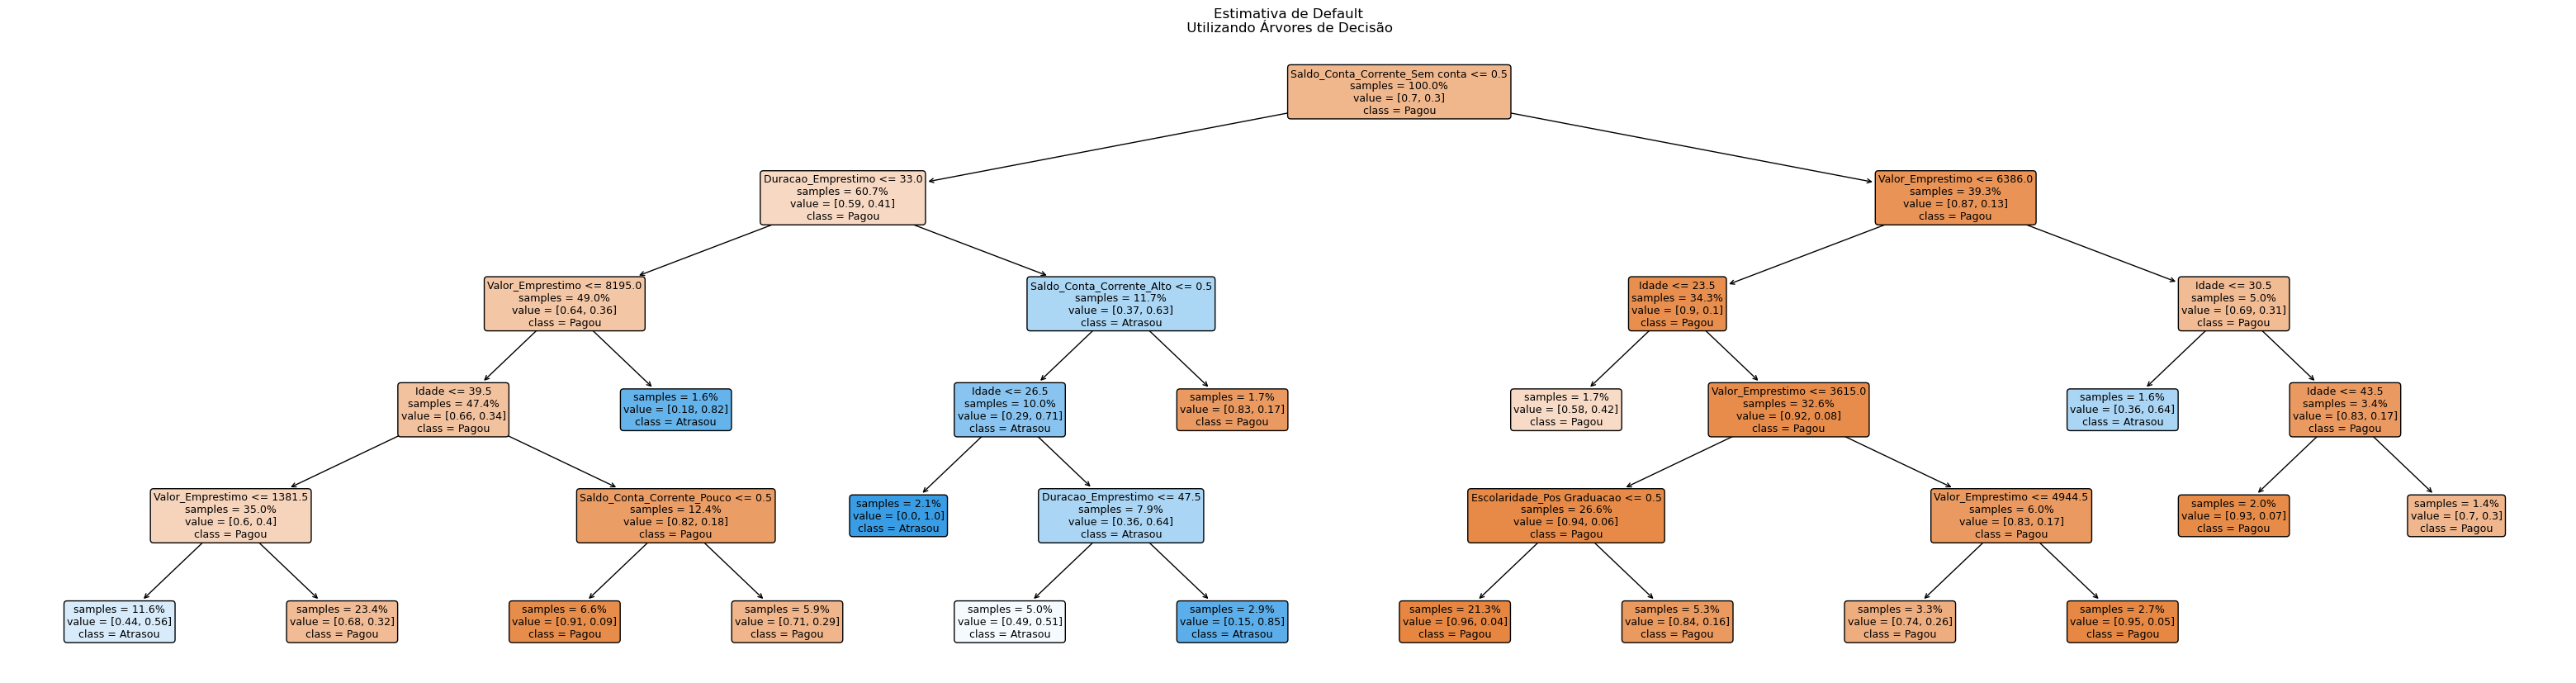

In [14]:
sns.reset_defaults()
%matplotlib inline

fig = plt.figure(figsize=(40,10))
features = list(x.columns)
class_names = ['Pagou','Atrasou']
tree.plot_tree(modelo_dt_reg,
               feature_names=features, 
               class_names=class_names,
               rounded=True, 
               precision=2,
               proportion=True,
               impurity=False,
               filled=True);
plt.title("Estimativa de Default\n Utilizando Árvores de Decisão");

d:\preditiva\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


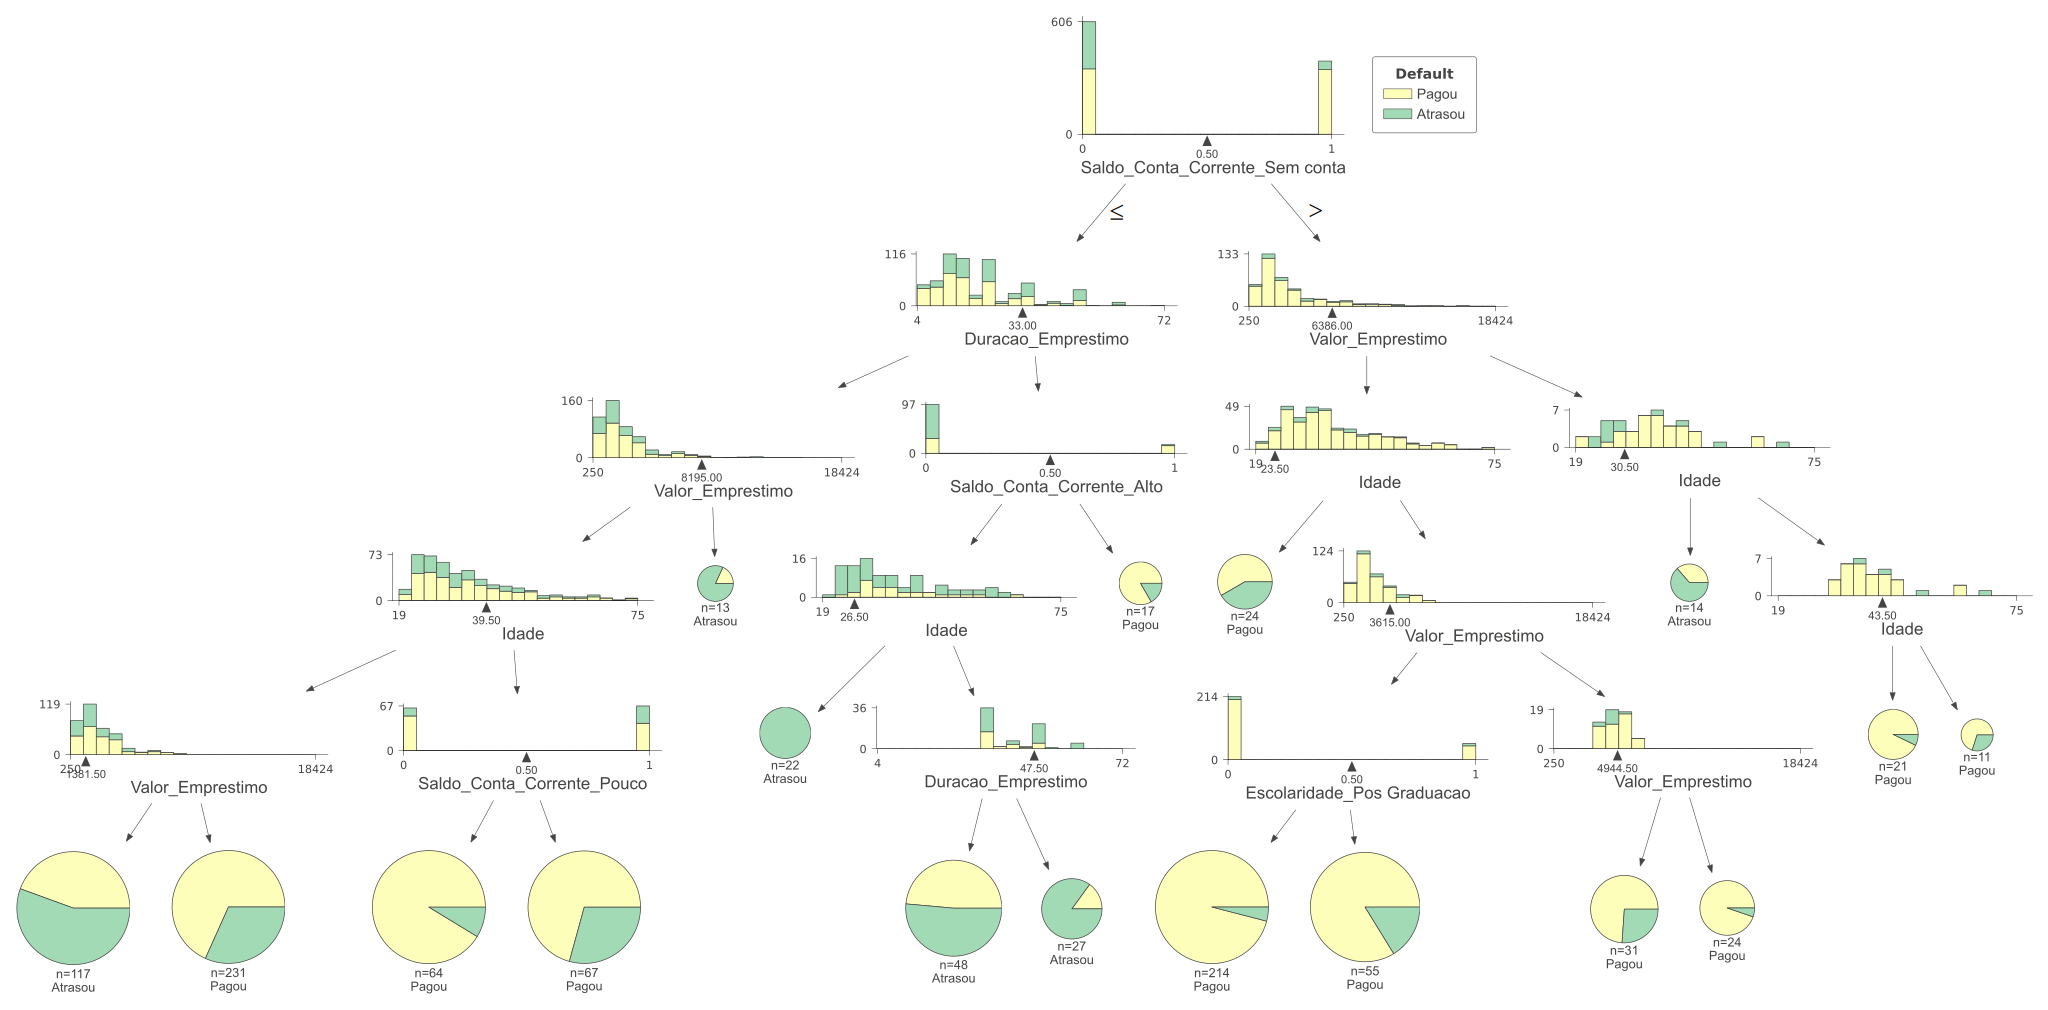

In [15]:
viz = dtreeviz(tree_model=modelo_dt_reg, 
               x_data=x, y_data=y, 
               target_name='Default',
               class_names=class_names,
               feature_names=features,
               scale=2.0)
viz